In [51]:
# import the Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#extract the data from the local PC
path=r"C:\Users\tirtha\Downloads\laptop_data.csv"
df=pd.read_csv(path)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [54]:
print(df.describe()) 
df.info()

       Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu 

In [55]:
# duplicated function return true and sum count the no. of true values
print('Total Duplicated Values:',df.duplicated().sum(),'\n')
#finding the missing values in dataframe and sum of it
print(df.isnull().sum())

Total Duplicated Values: 0 

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [56]:
#unnamed col doesnot make any usefulness data in dataframe so remove it 
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [57]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [58]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [59]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:'Yes' if 'Touchscreen' in x else 'No')


In [60]:
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Touchscreen ', '')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Yes
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Yes
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,No
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,No


In [61]:
SplitResolution = df['ScreenResolution'].str.split('x', n=1, expand=True)
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = df['X_res'].str.extract(r'(\d+)')
df['Y_res'] = df['Y_res'].str.extract(r'(\d+)')
df['X_res'] = pd.to_numeric(df['X_res'])
df['Y_res'] = pd.to_numeric(df['Y_res'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,2560,1600


In [62]:
df['Resolution'] = df['X_res'].astype(str) + 'x' + df['Y_res'].astype(str)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,X_res,Y_res,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,2560,1600,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,1440,900,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,1920,1080,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,2880,1800,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,2560,1600,2560x1600


In [63]:
df.drop(columns=['ScreenResolution', 'X_res', 'Y_res'], inplace=True)

In [64]:
 df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,2560x1600,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,1440x900,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,1920x1080,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,2880x1800,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,2560x1600,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Yes,1920x1080,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Yes,3200x1800,Intel Core i7
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,No,1366x768,Intel Celeron Dual
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,No,1366x768,Intel Core i7


In [65]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [66]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [67]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,Cpu Brand
566,Dell,Notebook,15.6,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.93,51095.52,No,1366x768,Intel Core i5
1054,Dell,Ultrabook,13.3,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.20,120093.12,Yes,3200x1800,Intel Core i7
158,Dell,2 in 1 Convertible,15.6,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.72,Yes,1920x1080,Intel Core i7
92,HP,Notebook,13.3,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,63776.16,No,1920x1080,Intel Core i7
363,HP,Notebook,15.6,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.92,No,1920x1080,Intel Core i5


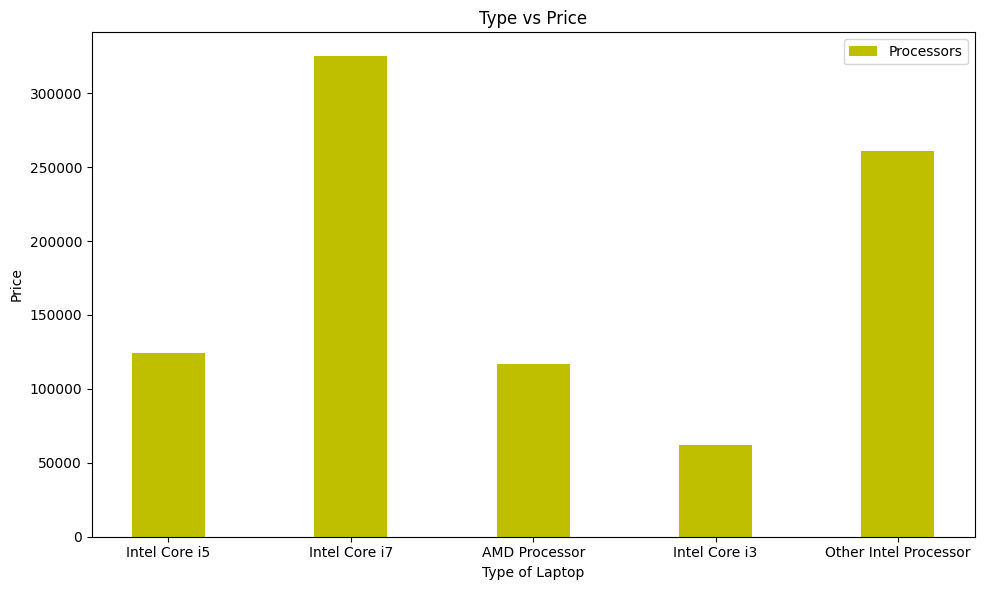

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(df['Cpu Brand'],df['Price'],width=0.4 ,color='y',align='center',label='Processors')
plt.title('Type vs Price')
plt.xlabel('Type of Laptop')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

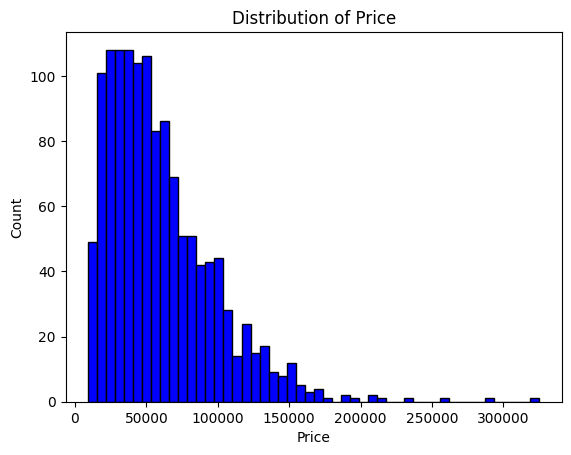

In [69]:
plt.hist(df['Price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

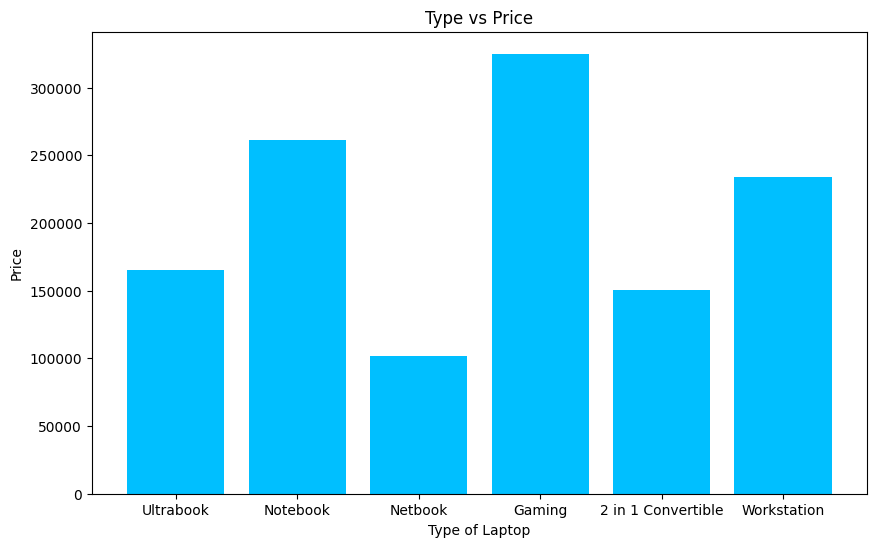

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(df['TypeName'],df['Price'], color="DeepSkyBlue")
plt.title('Type vs Price')
plt.xlabel('Type of Laptop')
plt.ylabel('Price')
plt.show()

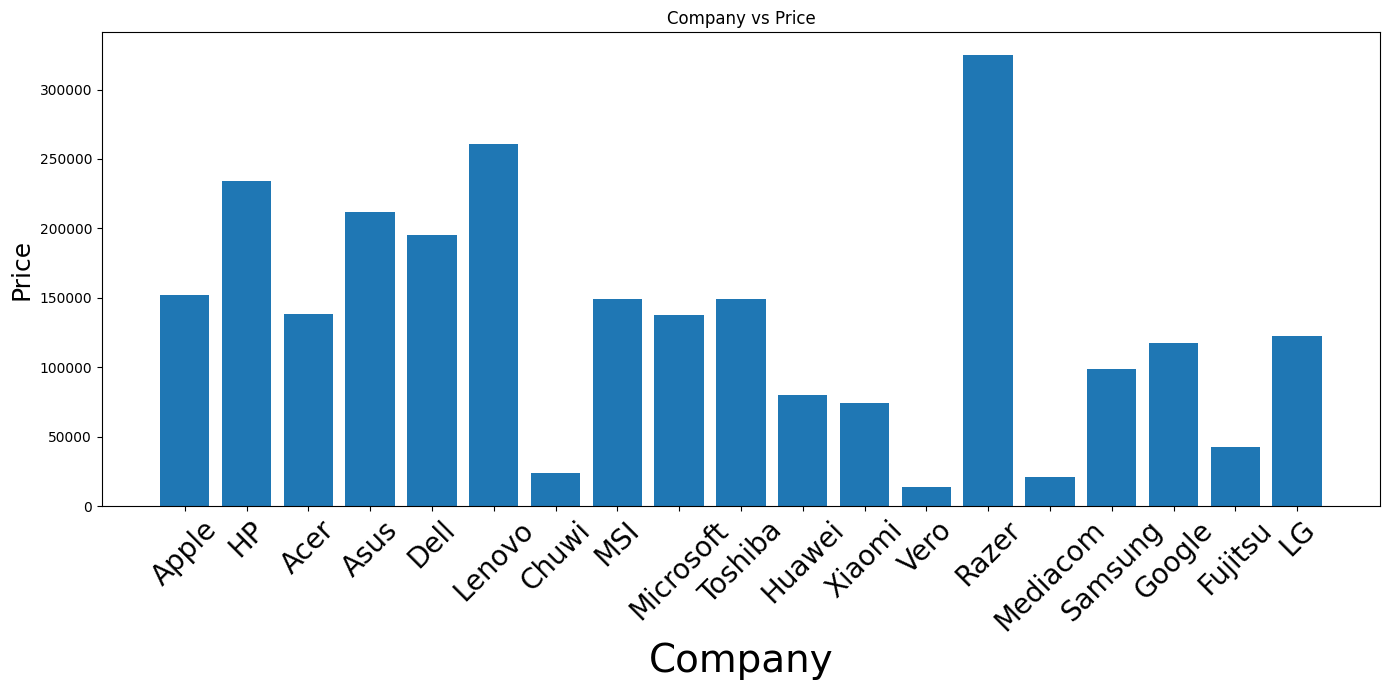

In [71]:
plt.figure(figsize=(14, 7))  # Set the figure size
plt.bar(df['Company'],df['Price'])
plt.title('Company vs Price')
plt.xlabel('Company',fontsize=28)
plt.ylabel('Price',fontsize=18)
plt.xticks(rotation=45,fontsize=20)
plt.tight_layout()
plt.show()

In [72]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

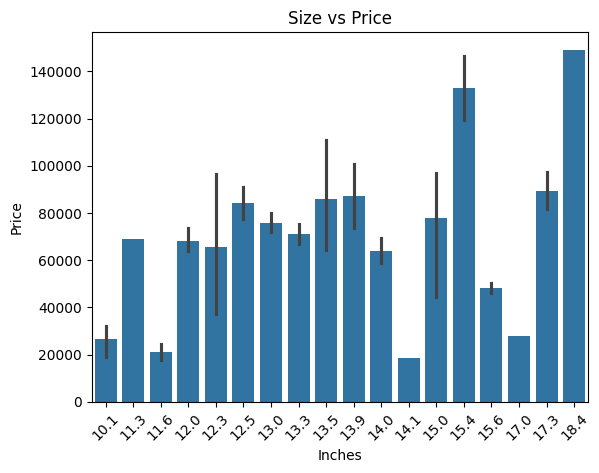

In [73]:
sns.barplot(x='Inches', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Size vs Price')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.show()

In [74]:
# Convert 'Memory' column to string and clean it
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split 'Memory' into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract the first part and remove any leading/trailing whitespace
df["first"] = new[0]
df["first"] = df["first"].str.strip()

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'first' and create binary columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer1Hybrid"] = df["first"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer1Flash_Storage"] = df["first"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'first' and convert it to float
df['first'] = df['first'].str.extract('(\d+)').astype(float)

# Extract the second part from the split and fill any NaN values with '0'
df["second"] = new[1]
df["second"].fillna("0", inplace=True)

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'second' and create binary columns
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
df["Layer2Hybrid"] = df["second"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
df["Layer2Flash_Storage"] = df["second"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'second' and convert it to float
df['second'] = df['second'].str.extract('(\d+)').astype(float)

# Calculate HDD, SSD, Hybrid, and Flash_Storage based on binary values and numeric parts
df["HDD"] = (df["first"] * df["Layer1HDD"] +
             df["second"] * df["Layer2HDD"]).astype(int)
df["SSD"] = (df["first"] * df["Layer1SSD"] +
             df["second"] * df["Layer2SSD"]).astype(int)
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] +
                df["second"] * df["Layer2Hybrid"]).astype(int)
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] +
                       df["second"] * df["Layer2Flash_Storage"]).astype(int)

# Drop the intermediate and binary columns
df.drop(columns=['first', 'second',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [75]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
784,Lenovo,Ultrabook,14.0,16,512 SSD,Intel HD Graphics 620,Windows 10,1.70,122490.7200,No,1920x1080,Intel Core i7,0,512,0,0
1259,MSI,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481.1200,No,1920x1080,Intel Core i7,1000,128,0,0
10,HP,Notebook,15.6,4,500 HDD,Intel HD Graphics 620,No OS,1.86,20986.9920,No,1366x768,Intel Core i5,500,0,0,0
16,Dell,Notebook,15.6,8,256 SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.6000,No,1920x1080,Intel Core i7,0,256,0,0
1158,Lenovo,Notebook,15.6,8,1000 Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,No,1920x1080,Intel Core i5,0,0,1000,0


In [76]:
df.drop(columns=['Memory'], inplace=True)

In [77]:
df.corr(numeric_only=True)['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [78]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True) 

In [79]:
df.sample(3)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,Cpu Brand,HDD,SSD
228,Asus,Notebook,17.3,8,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.48,No,1920x1080,Intel Core i5,500,256
729,HP,Notebook,15.6,4,AMD Radeon 520,Windows 10,2.10,26053.92,No,1920x1080,AMD Processor,1000,0
154,HP,Ultrabook,14.0,4,Intel HD Graphics 620,Windows 10,1.48,57648.96,No,1920x1080,Intel Core i5,0,256


In [80]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [81]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [82]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [83]:
df = df[df['GpuBrand'] != 'ARM']

In [84]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

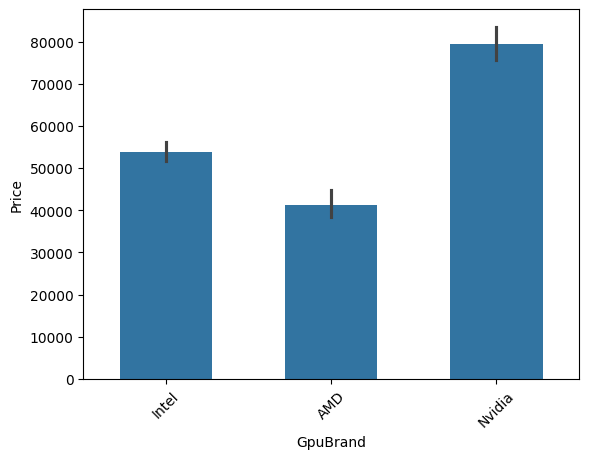

In [85]:
sns.barplot(x=df['GpuBrand'], y=df['Price'],width=0.56,data=df)
plt.xticks(rotation=45)
plt.show()

In [86]:
def categorizeOS(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [88]:
df.loc[:, 'os'] = df['OpSys'].apply(categorizeOS)

In [89]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Resolution,Cpu Brand,HDD,SSD,GpuBrand,os
353,HP,Workstation,15.6,8,Nvidia Quadro M1200,Windows 10,2.60,92615.0256,No,1920x1080,Intel Core i7,0,256,Nvidia,Windows
1108,HP,Notebook,15.6,4,AMD Radeon R4,Windows 10,2.10,21205.4400,No,1920x1080,AMD Processor,1000,0,AMD,Windows
722,Lenovo,Ultrabook,14.0,8,Intel HD Graphics 620,Windows 10,1.32,79866.7200,No,1920x1080,Intel Core i5,0,256,Intel,Windows
175,Dell,Notebook,15.6,8,Intel HD Graphics 620,Windows 10,2.30,24455.5200,No,1366x768,Intel Core i3,1000,0,Intel,Windows
1032,MSI,Gaming,17.3,8,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.1040,No,1920x1080,Intel Core i7,1000,128,Nvidia,Windows


In [90]:
df = df.drop(columns=['OpSys'])

<Axes: xlabel='Weight', ylabel='Density'>

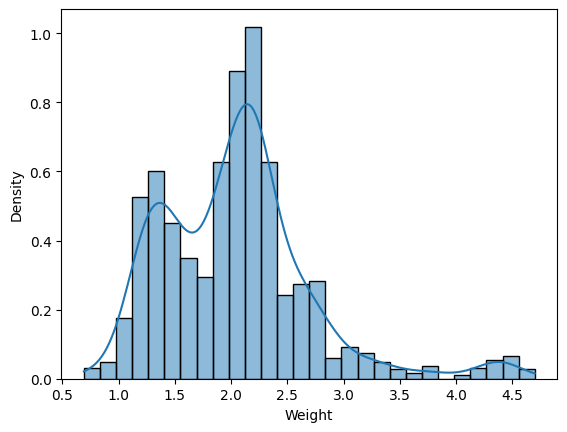

In [91]:
sns.histplot(df['Weight'], kde=True, stat='density') 

<Axes: xlabel='Weight', ylabel='Price'>

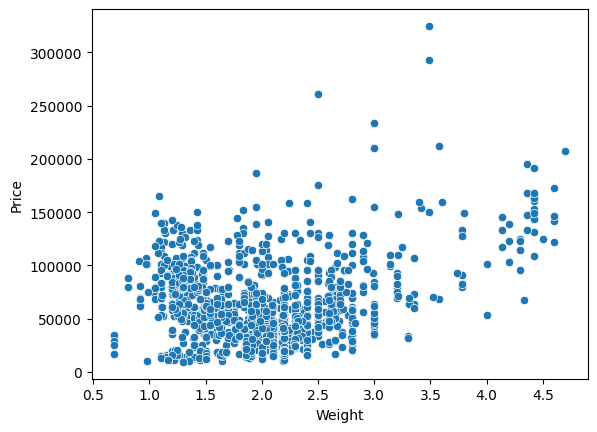

In [92]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

<Axes: >

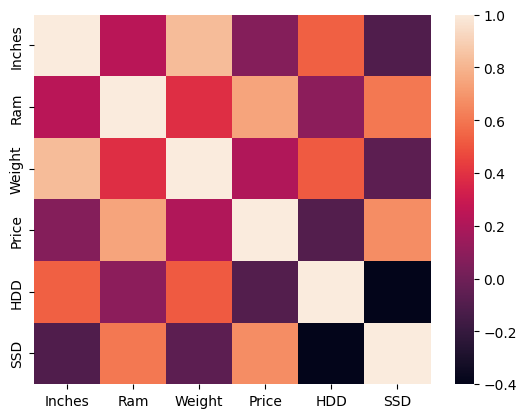

In [93]:
# Red means strongest correlation and white means extremely weak correlation
v=df.corr(numeric_only=True)
sns.heatmap(v)

<Axes: xlabel='Price', ylabel='Density'>

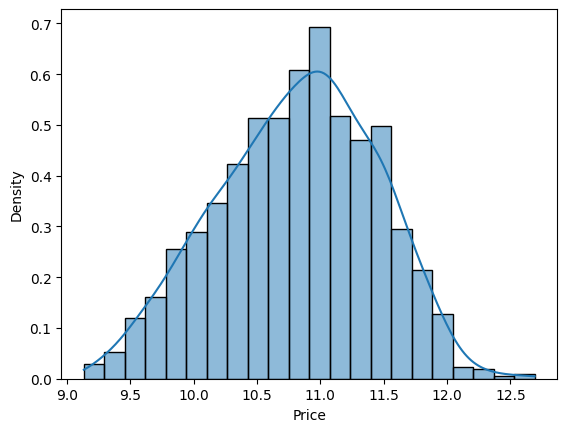

In [95]:
sns.histplot(np.log(df['Price']), kde=True, stat='density')

In [96]:
df.sample(5)

,Company,TypeName,Inches,Ram,Gpu,Weight,Price,Touchscreen,Resolution,Cpu Brand,HDD,SSD,GpuBrand,os
100,HP,Notebook,15.6,8,AMD Radeon 530,1.91,38308.3200,No,1920x1080,Intel Core i7,0,256,AMD,Windows
396,Lenovo,Notebook,15.6,8,AMD Radeon RX 550,2.10,65510.9568,No,1920x1080,Intel Core i7,0,256,AMD,Windows
605,MSI,Gaming,15.6,16,Nvidia GeForce GTX 1060,1.80,122490.7200,No,4x2160,Intel Core i7,2000,256,Nvidia,Windows
1012,HP,Notebook,14.0,4,Intel HD Graphics 620,1.48,84715.2000,No,1920x1080,Intel Core i5,0,256,Intel,Windows
41,Dell,Gaming,15.6,16,Nvidia GeForce GTX 1060,2.65,79866.7200,No,1920x1080,Intel Core i7,1000,256,Nvidia,Windows
